In [2]:
import numpy as np
import os

from PIL import Image
import cv2

import matplotlib.pyplot as plt

In [3]:
INPUT_DIR_IMAGES = os.path.abspath("resized_images_bin")

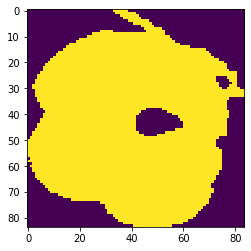

In [4]:
files = os.listdir(INPUT_DIR_IMAGES)

images = []
for i, file in enumerate(files):
    image = Image.open("{}/{}".format(INPUT_DIR_IMAGES, file))
    _, image_bin = cv2.threshold(np.array(image), 254, 1, cv2.THRESH_BINARY)
    image = np.array(image_bin, dtype=np.uint8)
    images.append(image)
plt.imshow(images[1])
plt.show()

In [53]:
vectors = []
indexed_vectors = {}
image = images[0]
image_shape = image.shape
for row_index, row in enumerate(image):
    next_row_index = row_index + 1 if row_index != image_shape[0] - 1 else False
    indexed_vectors[row_index] = []
    for col_index, pixel in enumerate(row):
        tmp_vectors = []
        
        if pixel == 0:
            continue
        
        if col_index != image_shape[1] - 1:
            next_col_index = col_index + 1
            # check b
            if image[row_index][next_col_index] == 1:
                tmp_vectors.append((row_index, col_index + 1))
            
            # check e
            if next_row_index:
                if image[next_row_index][next_col_index] == 1:
                    tmp_vectors.append((next_row_index, next_col_index))
                    
        # check c
        if next_row_index:
            if col_index != 0:
                if image[next_row_index][col_index - 1] == 1:
                    tmp_vectors.append((next_row_index, col_index - 1))
        
        # check d
        if next_row_index:
            if image[next_row_index][col_index] == 1:
                tmp_vectors.append((next_row_index, col_index))
        
        if len(tmp_vectors) == 0:
            continue
        
        tmp_vectors = np.array(tmp_vectors, dtype=np.uint8)
        tmp_vectors_rows = tmp_vectors[:, 0]
        tmp_vectors_cols = tmp_vectors[:, 1]
        avg_row = int(round(sum(tmp_vectors_rows) / len(tmp_vectors_rows)))
        avg_col = int(round(sum(tmp_vectors_cols) / len(tmp_vectors_cols)))
        vectors.append([(row_index, col_index), (avg_row, avg_col)])
        indexed_vectors[row_index].append([(row_index, col_index), (avg_row, avg_col)])

In [18]:
vectors = np.array(vectors, dtype=np.uint8)

In [57]:
last_row_vectors = indexed_vectors[len(indexed_vectors) - 1]
print(last_row_vectors)
final_vector_last_point = [last_row_vectors[0][0][0], 0]
for start_point, end_point in last_row_vectors:
    final_vector_last_point[1] += end_point[1]
    
final_vector_last_point[1] = round(final_vector_last_point[1] / len(last_row_vectors))

for row, row_vectors in indexed_vectors.items():
    for vectors_ in row_vectors:
        #print(vectors_)
        pass

[[(83, 33), (83, 34)], [(83, 34), (83, 35)], [(83, 35), (83, 36)], [(83, 36), (83, 37)], [(83, 37), (83, 38)], [(83, 38), (83, 39)], [(83, 39), (83, 40)], [(83, 40), (83, 41)], [(83, 41), (83, 42)], [(83, 42), (83, 43)], [(83, 43), (83, 44)], [(83, 44), (83, 45)], [(83, 45), (83, 46)], [(83, 46), (83, 47)], [(83, 47), (83, 48)], [(83, 48), (83, 49)], [(83, 49), (83, 50)], [(83, 50), (83, 51)], [(83, 51), (83, 52)]]


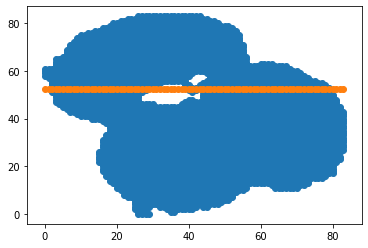

In [115]:
image_coords = []
for row_index, row in enumerate(images[4]):
    for col_index, pixel in enumerate(row):
        if pixel == 1:
            image_coords.append([row_index, col_index])
image_coords = np.array(image_coords)

plt.scatter(image_coords[:, 0], image_coords[:, 1])

m, b = np.polyfit(image_coords[:, 0], image_coords[:, 1], 1)
x = [i for i in range(84)]
y = [a * x_ + b for x_ in x]
plt.scatter(x, y)

plt.show()

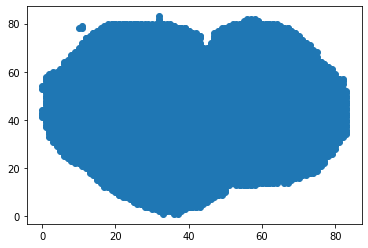

In [7]:
plt.scatter(vectors[:, 0, 0], vectors[:, 1, 1])
plt.show()

TODO: Complete algorithm

In [8]:
principal_line = []
for row_index, row in enumerate(image):
    active_pixels = [j for j, pixel in enumerate(row) if pixel == 1]
    if len(active_pixels) == 0:
        continue
    principal_line.append([row_index, int(round(sum(active_pixels) / len(active_pixels)))])

principal_line = np.array(principal_line, dtype=np.uint8)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83] [46 48 46 46 44 44 44 44 45 45 46 48 48 46 47 46 46 46 46 46 46 44 44 44
 44 43 43 42 42 42 42 41 42 41 40 41 40 40 40 40 40 40 40 39 38 38 39 42
 42 43 44 46 46 46 46 46 47 47 47 48 47 47 47 47 46 47 46 46 46 46 46 45
 44 44 44 43 42 42 44 44 44 44 44 42]


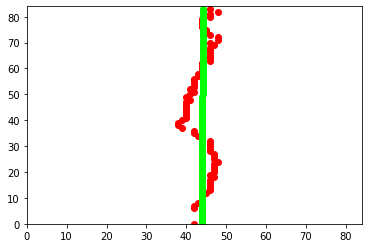

-0.2848232864955594 -0.004971145084540253


In [9]:
print(principal_line[:, 0], principal_line[:, 1])
plt.scatter(principal_line[:, 1][::1], principal_line[:, 0][::-1], c="#FF0000")
plt.xlim(0, 84)
plt.ylim(0, 84)

approx_m, approx_b = np.polyfit(principal_line[:, 0], principal_line[:, 1], 1)

x = [i for i in range(84)]
y = [approx_m * i + approx_b for i in x]

plt.scatter(y, x[::-1], c="#00FF00")
plt.show()

rotation_angle = np.degrees(np.arctan(approx_m))
print(rotation_angle, approx_m)

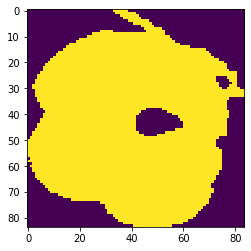

In [10]:
rotation_matrix = cv2.getRotationMatrix2D((42, 42), rotation_angle, 1)
rotated = cv2.warpAffine(images[1], rotation_matrix, (84, 84))

plt.imshow(rotated)
plt.show()

In [12]:
moments = cv2.moments(images[1])
moments

{'m00': 4637.0,
 'm10': 184736.0,
 'm01': 204052.0,
 'm20': 9228692.0,
 'm11': 8159143.0,
 'm02': 10818494.0,
 'm30': 516016238.0,
 'm21': 408090313.0,
 'm12': 436619483.0,
 'm03': 638160760.0,
 'mu20': 1868892.6262669833,
 'mu11': 29802.850765581243,
 'mu02': 1839149.875781756,
 'mu30': -562399.4216335416,
 'mu21': -394564.90857470036,
 'mu12': 2992575.4751268476,
 'mu03': 226803.00322675705,
 'nu20': 0.08691808689168706,
 'nu11': 0.0013860650612319964,
 'nu02': 0.08553481696235114,
 'nu30': -0.00038410691490774993,
 'nu21': -0.0002694794907919368,
 'nu12': 0.0020438657814420003,
 'nu03': 0.00015490165620761807}

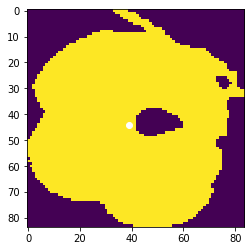

In [14]:
cX = int(moments["m10"] / moments["m00"])
cY = int(moments["m01"] / moments["m00"])

plt.imshow(rotated)
plt.scatter([cX], [cY], c="#FFFFFF")
plt.show()